<p>El objeto de este ejercicio es mostrar como en ciertos problemas la posibilidad de visualizar lo resultados puede ayudar enormemente a resolverlos. Primero utilizamos gr&aacute;ficas simples de funciones, $plot$, que podemos dinamizar con $animate$. En la &uacute;ltima parte construimos un gr&aacute;fico m&aacute;s complejo, usando $matrix\_plot$, &nbsp;que contiene la informaci&oacute;n que realmente nos interesa.&nbsp;</p>

In [1]:
var('a b')

(a, b)

In [2]:
p(x,a,b)=x^4-6*x^2+a*x+b

<h4>Caso $a=0$ y $b$ variando.&nbsp;</h4>

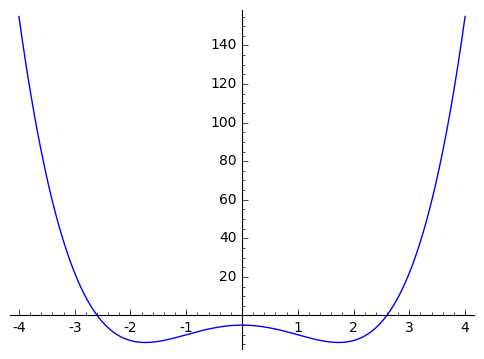

In [3]:
plot(p(a=0,b=-5),-4,4,figsize=5)

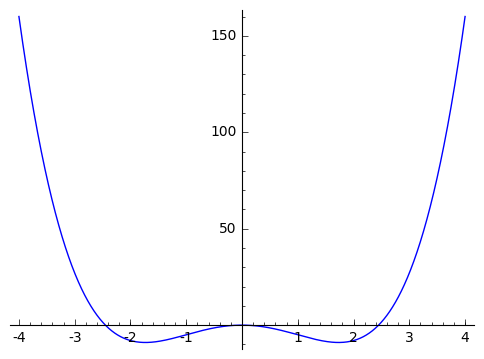

In [4]:
plot(p(a=0,b=0),-4,4,figsize=5)

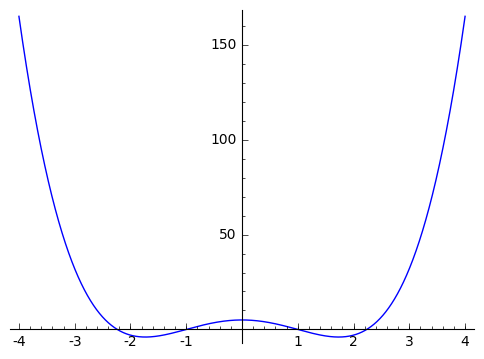

In [5]:
plot(p(a=0,b=5),-4,4,figsize=5)

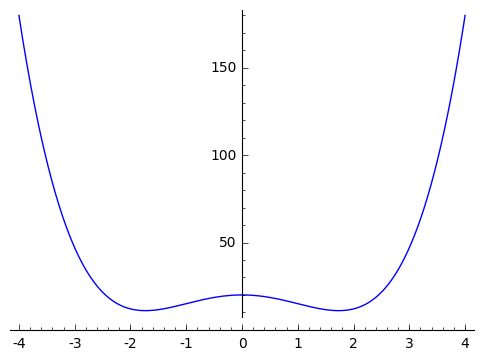

In [6]:
plot(p(a=0,b=20),-4,4,figsize=5)

In [7]:
A0 = [plot(p(a=0,b=k),(-4,4),ymin=-60,ymax=120,figsize=5) for k in srange(-40,40)]
A = animate(A0)
A.save('raices.gif')

<p>Los gr&aacute;ficos animados permiten ver un poco mejor lo que est&aacute; pasando, en este caso,&nbsp; bastante simple, el desplazamiento de la gr&aacute;fica hacia arriba cuando $b$ crece.&nbsp; Puedes ver una serie de ejemplos de animaciones en esta <a href="http://wiki.sagemath.org/animate"> p&aacute;gina.</a></p>
<h4>Caso $a=8$ y $b$ variando&nbsp;</h4>

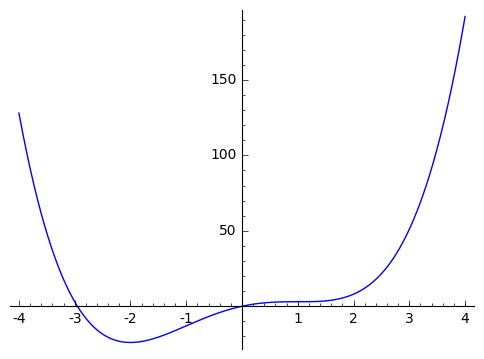

In [8]:
plot(p(a=8,b=0),-4,4,figsize=5)

<p>Cuando damos valores positivos a $b$ la gr&aacute;fica sube y cuando le damos valores negativos baja, pero, una vez fijamos $a$, siempre conserva la misma forma.</p>

In [9]:
q = diff(p(a=8),x);q

4*x^3 - 12*x + 8

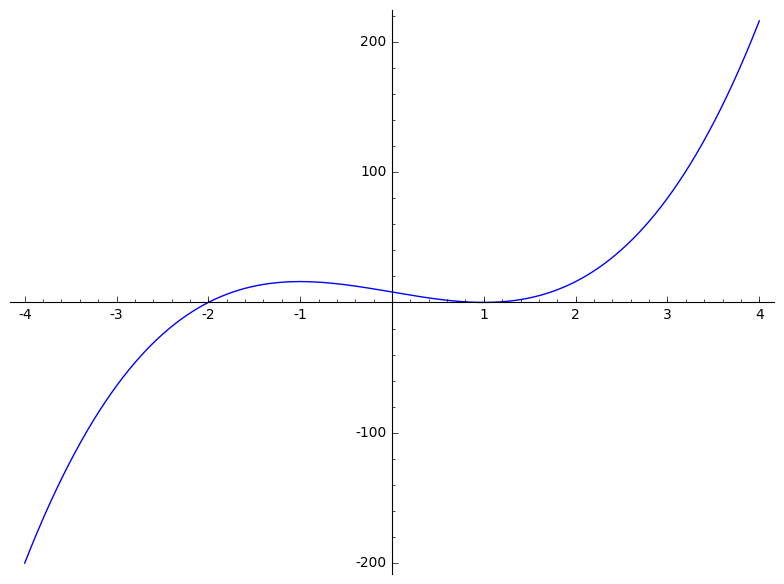

In [10]:
plot(q,-4,4)

In [11]:
solve(q,x)

[x == -2, x == 1]

In [12]:
factor(q)

4*(x + 2)*(x - 1)^2

<p>Es claro que la gr&aacute;fica de $q$ tiene&nbsp; un m&iacute;nimo en $x=-2$ y en $x=1$ se anulan la primera y la segunda derivadas y no es ni m&iacute;nimo ni m&aacute;ximo.&nbsp; La gr&aacute;fica es casi horizontal cerca de $x=1$, pero a&uacute;n as&iacute; la funci&oacute;n parece crecer. Para verlo calculamos $20$ valores de la funci&oacute;n separados por $0{.}1$ unidades:</p>

In [13]:
[p(x=0.1*k,a=8,b=0) for k in srange(1,21)]

[0.740100000000000,
 1.36160000000000,
 1.86810000000000,
 2.26560000000000,
 2.56250000000000,
 2.76960000000000,
 2.90010000000000,
 2.96960000000000,
 2.99610000000000,
 3.00000000000000,
 3.00410000000000,
 3.03360000000000,
 3.11610000000000,
 3.28160000000000,
 3.56250000000000,
 3.99360000000000,
 4.61210000000000,
 5.45760000000000,
 6.57210000000000,
 8.00000000000000]

<p>Calculamos el valor de $b$ a partir del cual ya no hay soluciones reales de $p(x,8,b)$. Debemos subir la gr&aacute;fica tanto como el valor de la funci&oacute;n en el m&iacute;nimo:</p>

In [14]:
p(x=-2,a=8,b=0)

-24

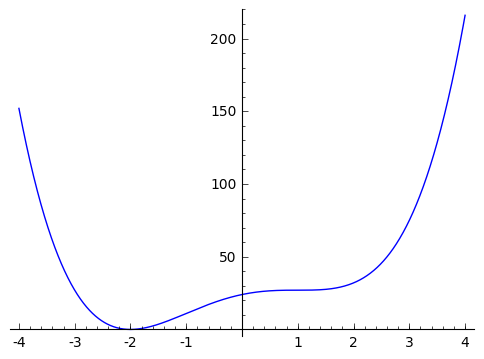

In [15]:
plot(p(a=8,b=24),-4,4,figsize=5)

<p>En particular, habr&iacute;a que demostrar que:</p>
<ol>
<li>La funci&oacute;n $p(x,8,0)$, que vale $0$ en $x=0$,&nbsp; es creciente para $x\ge-2$ y por tanto no tiene ninguna ra&iacute;z real con $x\ge0.$</li>
<li>La funci&oacute;n $p(x,8,0)$ tiene exactamente dos ra&iacute;ces reales, una en $x=0$ y la otra en un $x$ menor que $-2.$</li>
<li>Finalmente habr&iacute;a que demostrar que para $b\ge24$ no hay ra&iacute;ces reales y para $b\le 24$ hay dos ra&iacute;ces reales, en el caso $b=24$ una ra&iacute;z real doble en el punto $x=-2.$</li>
</ol>
<h4>Caso general&nbsp;</h4>
<p>Queremos ahora estudiar la funci&oacute;n</p>
<p>$$rr(a,b):=\#\{\text{raices reales de $p(x,a,b)=0$ contadas con su multiplicidad}\}.$$</p>
<p>Se trata de una funci&oacute;n&nbsp; $rr(a,b):\mathbb{R}^2\to \{0,2,4\}$, que divide el plano real en regiones en las que el n&uacute;mero de ra&iacute;ces reales es constante. Se trata de obtener, usando Sage, una idea lo m&aacute;s precisa posible del mapa que produce la funci&oacute;n $rr(a,b)$.&nbsp; Por suerte, Sage dispone de una funci&oacute;n que permite contar el n&uacute;mero de ra&iacute;ces reales f&aacute;cilmente. En este momento, no necesitamos saber c&oacute;mo lo hace, pero si te interesa puedes consultar esta <a href="http://en.wikipedia.org/wiki/Descartes%27_rule_of_signs"> p&aacute;gina de la Wikipedia.</a> y  <a href="https://en.wikipedia.org/wiki/Sturm's_theorem"> esta otra.</a></p>

In [16]:
from sage.rings.polynomial.real_roots import *

In [17]:
R.<x>=QQ[] #Definimos el anillo de polinomios en una variable

In [18]:
P1 = R(p(a=0,b=0));P1

x^4 - 6*x^2

In [19]:
real_roots(P1)

[((-21/8, -9/4), 1), ((-47/256, 81/512), 2), ((9/4, 21/8), 1)]

In [20]:
def numero_reales(P):
    return sum([item[1] for item in real_roots(P)])

In [21]:
numero_reales(P1)

4

In [22]:
def generar_matriz(n):
    M = matrix(ZZ,2*n+1,2*n+1,(2*n+1)**2*[0])
    for A in srange(-n,n+1):
        for B in srange(-n,n+1):
            P = R(p(a=A,b=B))
            M[-B+n,n+A]=numero_reales(P)
    return M

<p>Hemos definido una funci&oacute;n de Sage que produce una matriz que en el lugar $ij$ tiene el n&uacute;mero de ra&iacute;ces reales de $p(x,a,b)$ con $i=B-n$ y $j=A+n$. De esta forma se consigue que el lugar de la matriz correspondiente a $A=-n,B=n$ sea el $00$.</p>
<p>Como la matriz tiene $3$ posibles valores para sus entradas, $0,2,4$, $matrix\_plot$ utiliza tres tonos de gris: negro para el $0$, gris para el $2$ y blanco para el $4$. &nbsp;La l&iacute;nea $a=0$ es la vertical que divide al cuadrado en dos partes iguales, y, como sabemos pasa de $2$ ra&iacute;ces reales para $b$ negativo a cuatro y luego a cero. &nbsp;</p>

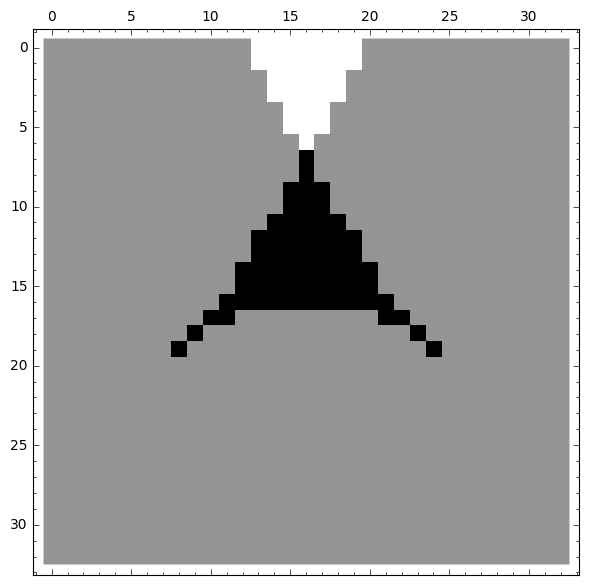

In [23]:
matrix_plot(generar_matriz(16))

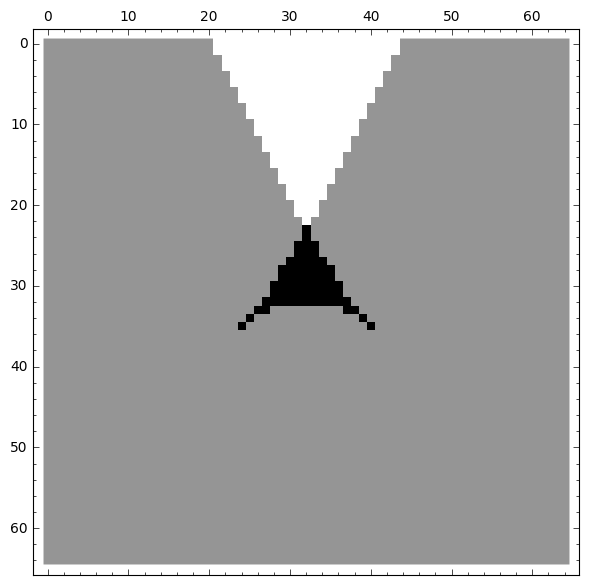

In [24]:
matrix_plot(generar_matriz(32))

<h4>Comprobemos el caso $a=8$:</h4>
<p>Usando la funci&oacute;n $numero\_reales$ podemos comprobar el caso $a=8$, y, en particular vemos que es posible quen haya $4$ ra&iacute;ces reales.</p>

In [25]:
M = generar_matriz(32)

In [26]:
L=list(M.column(40));show(L)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

<p>Vemos que aparece un $4$ en la lista.</p>

In [27]:
[(B,numero_reales(R(p(a=8,b=B)))) for B in srange(-32,32)]

[(-32, 2),
 (-31, 2),
 (-30, 2),
 (-29, 2),
 (-28, 2),
 (-27, 2),
 (-26, 2),
 (-25, 2),
 (-24, 2),
 (-23, 2),
 (-22, 2),
 (-21, 2),
 (-20, 2),
 (-19, 2),
 (-18, 2),
 (-17, 2),
 (-16, 2),
 (-15, 2),
 (-14, 2),
 (-13, 2),
 (-12, 2),
 (-11, 2),
 (-10, 2),
 (-9, 2),
 (-8, 2),
 (-7, 2),
 (-6, 2),
 (-5, 2),
 (-4, 2),
 (-3, 4),
 (-2, 2),
 (-1, 2),
 (0, 2),
 (1, 2),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 2),
 (6, 2),
 (7, 2),
 (8, 2),
 (9, 2),
 (10, 2),
 (11, 2),
 (12, 2),
 (13, 2),
 (14, 2),
 (15, 2),
 (16, 2),
 (17, 2),
 (18, 2),
 (19, 2),
 (20, 2),
 (21, 2),
 (22, 2),
 (23, 2),
 (24, 2),
 (25, 0),
 (26, 0),
 (27, 0),
 (28, 0),
 (29, 0),
 (30, 0),
 (31, 0)]

<p>Y que el cuatro corresponde al valor $b=-3$.</p>

In [28]:
R(p(a=8,b=-3)).factor()

(x + 3) * (x - 1)^3

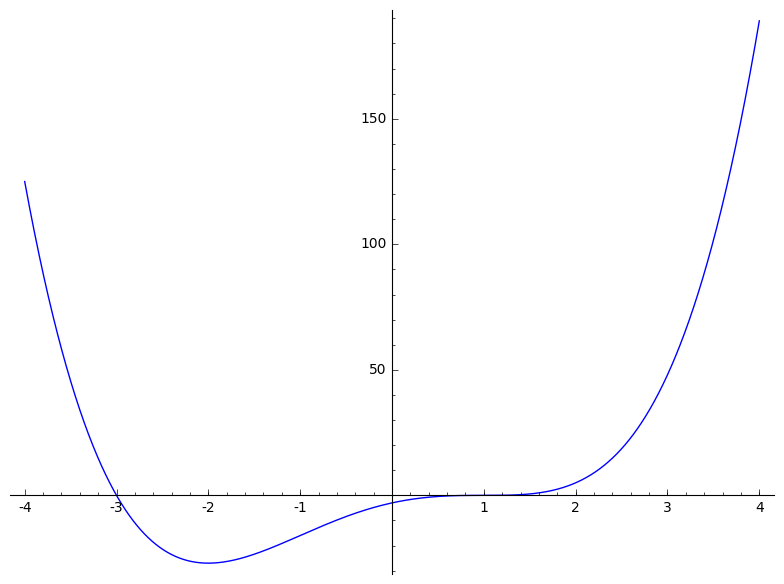

In [29]:
plot(p(a=8,b=-3),-4,4)

<p>&nbsp;</p>
<p>&nbsp;</p>

<h4>¿CONTINUAR&Aacute;...?</h4>